In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import math


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar10_data = torchvision.datasets.CIFAR10('../../data/cifar-10', download=True, train=True, transform=transform)
data_loader = torch.utils.data.DataLoader(cifar10_data,
                                          batch_size=4,
                                          shuffle=False,
                                          num_workers=1)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST('../../data/mnist', download=True, train=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=4,
                                          shuffle=False,
                                          num_workers=1)

In [2]:

def replace_tensor_value_(tensor, a, b):
    tensor[tensor == a] = b
    return tensor

def plot_images(images, num_per_row=8, title=None):
    num_rows = int(math.ceil(len(images) / num_per_row))

    fig, axes = plt.subplots(num_rows, num_per_row, dpi=150)
    fig.subplots_adjust(wspace=0, hspace=0)

    for image, ax in zip(images, axes.flat):
        if image.shape[0] ==3:
            image = image.permute(1, 2, 0)
        ax.imshow(image)
        ax.axis('off')

    return fig


# Color palette for segmentation masks
PALETTE = np.array(
    [
        [0, 0, 0],
        [128, 0, 0],
        [0, 128, 0],
        [128, 128, 0],
        [0, 0, 128],
        [128, 0, 128],
        [0, 128, 128],
        [128, 128, 128],
        [64, 0, 0],
        [192, 0, 0],
        [64, 128, 0],
        [192, 128, 0],
        [64, 0, 128],
        [192, 0, 128],
        [64, 128, 128],
        [192, 128, 128],
        [0, 64, 0],
        [128, 64, 0],
        [0, 192, 0],
        [128, 192, 0],
        [0, 64, 128],
    ]
    + [[0, 0, 0] for i in range(256 - 22)]
    + [[255, 255, 255]],
    dtype=np.uint8,
)


def array1d_to_pil_image(array):
    pil_out = Image.fromarray(array.astype(np.uint8), mode='P')
    pil_out.putpalette(PALETTE)
    return pil_out

In [3]:
imagenet_mean = [0.485, 0.456, 0.406]  # mean of the imagenet dataset for normalizing
imagenet_std = [0.229, 0.224, 0.225]  # std of the imagenet dataset for normalizing

input_resize = transforms.Resize((224, 224))
input_transform = transforms.Compose(
    [
        input_resize,
        transforms.ToTensor(),
        transforms.Normalize(imagenet_mean, imagenet_std),
    ]
)
target_resize = transforms.Resize((224, 224), interpolation=Image.NEAREST)
target_transform = transforms.Compose(
    [
        target_resize,
        transforms.ToTensor(),
        transforms.Lambda(lambda x: replace_tensor_value_(x.squeeze(0).long(), 255, 21)),
    ]
)

/tmp/ipykernel_4078/491559433.py:12: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  target_resize = transforms.Resize((224, 224), interpolation=Image.NEAREST)


In [ ]:

pascal_data = torchvision.datasets.VOCSegmentation('../../data/voc_segmentation', download=False, image_set="train", transform=input_transform, target_transform=target_transform)
data_loader = torch.utils.data.DataLoader(pascal_data,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=1)

In [ ]:
dataiter = iter(data_loader)
images, labels = next(dataiter)


In [ ]:
_ = plot_images(images,4)

In [ ]:
_ = plot_images(labels, 4)

In [122]:
label_transform = transforms.Compose(
    [transforms.Lambda(lambda x: [x['annotation']['object'][0]['name']] if type(x['annotation']['object'])==list else [x['annotation']['object']['name']])] # Just take the first label
)

voc_detection = torchvision.datasets.VOCDetection('../../data/voc_segmentation', download=False, image_set="train", transform=input_transform, target_transform=label_transform)
data_loader_detection = torch.utils.data.DataLoader(voc_detection,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=1)



In [123]:
dataiter_detection = iter(data_loader_detection)
images_detection, labels_detection = next(dataiter_detection)

In [124]:
labels_detection

[('horse',
  'bottle',
  'dog',
  'tvmonitor',
  'car',
  'aeroplane',
  'bicycle',
  'aeroplane',
  'person',
  'train',
  'dog',
  'cat',
  'dog',
  'tvmonitor',
  'car',
  'car')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

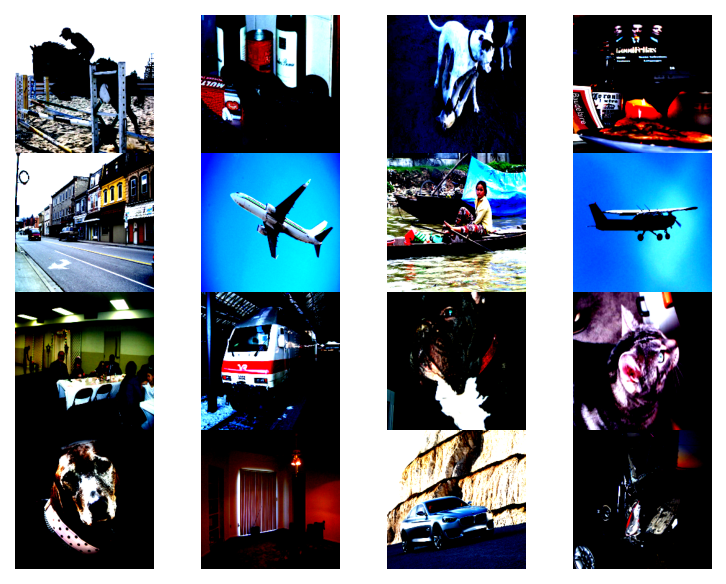

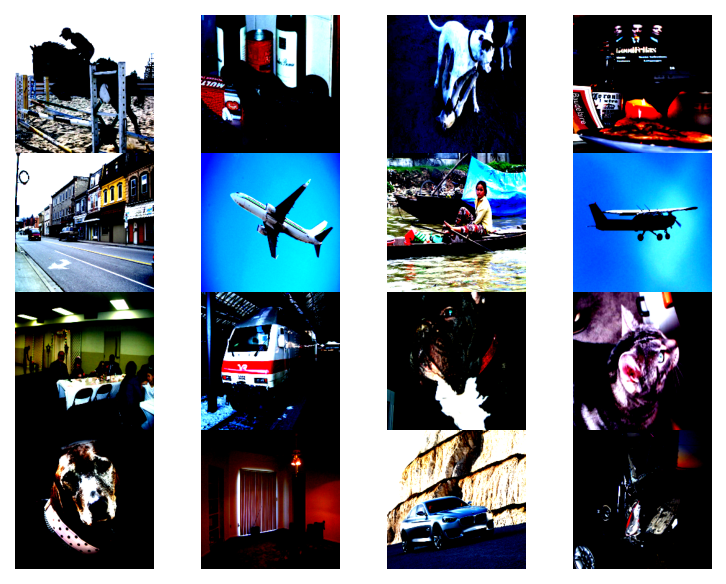

In [126]:
plot_images(images_detection, 4)

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg) # np.permute(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
# get some random training images
dataiter = iter(data_loader)
images, labels = next(dataiter)

im = transforms.ToPILImage()(images[0])
im.save('test.png')

for i in range(len(images)):
    transforms.ToPILImage()(images[i]).convert("RGB").save(f'mnist_{i}_rgb.png')


In [ ]:
# get some random training images
dataiter = iter(data_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
img = images[0]
img = img / 2 + 0.5     # unnormalize
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()


In [ ]:
from PIL import Image, ImageFilter

In [ ]:
im = transforms.ToPILImage()(images[0] / 2 + 0.5)
plt.imshow(im)

In [ ]:
for i in range(len(images)):
    transforms.ToPILImage()(images[i] / 2 + 0.5).save(f'cifar10_{i}.png')


In [ ]:
im = im.convert("L")
im.filter(ImageFilter.FIND_EDGES)